c:\Users\arife\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Detectado array 3D. Usando slice [:,:,1].
Dimensiones coinciden. Generando gráfico...


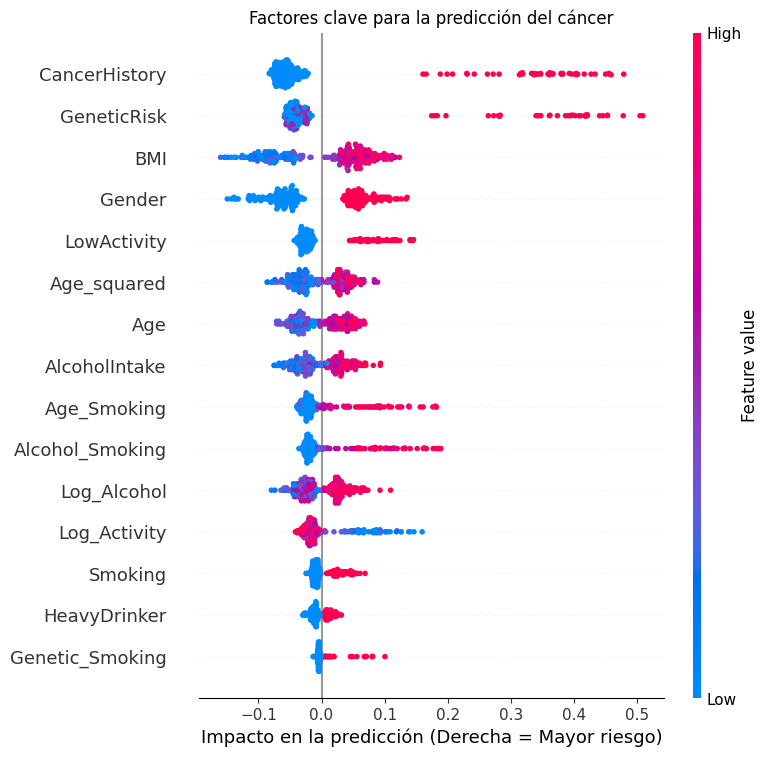

In [ ]:
import shap
import joblib
import matplotlib.pyplot as plt
import numpy as np


#ESTO ES SOLO PARA VALIDAR LAS VARIABLES DEL CÁLCULO DE RIESGO DE CÁNCER (GENERAL)

# 1. Cargar datos
try:
    modelo = joblib.load('modelo_cancer_final.pkl')
    X_test_shap = joblib.load('X_test_shap.pkl')
    columnas = joblib.load('columnas_finales.pkl')
except FileNotFoundError:
    print("Faltan archivos. Ejecuta primero el código de entrenamiento.")

# 2. Calcular SHAP
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_test_shap)

valores_para_grafico = None

if isinstance(shap_values, list):
    # Caso A: Es una lista (común en clasificadores). Usamos el índice 1 (Cáncer)
    print("Detectado formato lista. Usando índice [1] para clase positiva.")
    valores_para_grafico = shap_values[1]
else:
    # Caso B: Ya es un array (común en versiones nuevas o regresión)
    # Verificamos si tiene 3 dimensiones (N, M, 2) y tomamos la clase positiva
    if len(shap_values.shape) == 3:
        print("Detectado array 3D. Usando slice [:,:,1].")
        valores_para_grafico = shap_values[:,:,1]
    else:
        print("Detectado array 2D. Usando directo.")
        valores_para_grafico = shap_values

# Verificar dimensiones antes de graficar para evitar el AssertionError
if valores_para_grafico.shape != X_test_shap.shape:
    print(f"¡Aviso de dimensiones! SHAP: {valores_para_grafico.shape}, X: {X_test_shap.shape}")
    # Si pasa esto, forzamos el ajuste
    # (Solo si es un error raro de transposición)
else:
    print("Dimensiones coinciden. Generando gráfico...")

# 3. Graficar
plt.figure(figsize=(10, 8))
shap.summary_plot(
    valores_para_grafico, 
    X_test_shap, 
    feature_names=columnas, 
    show=False
)
plt.title("Factores clave para la predicción del cáncer")
plt.xlabel("Impacto en la predicción (Derecha = Mayor riesgo)")
plt.savefig("grafico_interpretacion_shap.png", bbox_inches='tight')
plt.show()